<a href="https://colab.research.google.com/github/Sachinrn28/D-analysis-assignments/blob/main/Data_analysis_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing all necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset


In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv", parse_dates=['date']) #Date time format :

In [13]:
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
51415,TLS,Asia,Timor,2020-01-08,24.0,0.0,0.000,NaN,0.0,0.000,...,6570.102,30.3,335.346,6.86,6.3,78.1,28.178,5.9,69.50,0.625
7907,BRN,Asia,Brunei,2020-03-28,115.0,1.0,5.286,NaN,0.0,0.000,...,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.7,75.86,0.853
28016,KEN,Africa,Kenya,2020-08-09,35205.0,102.0,143.429,599.0,2.0,3.143,...,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.70,0.590
44242,STP,Africa,Sao Tome and Principe,2020-04-27,8.0,0.0,0.571,NaN,0.0,0.000,...,3052.714,32.3,270.113,2.42,NaN,NaN,41.340,2.9,70.39,0.589
21157,GRD,North America,Grenada,2020-04-24,15.0,0.0,0.143,NaN,0.0,0.000,...,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.7,72.40,0.772


In [ ]:
#Understanding the data

In [14]:
print("The sahape of the data is:",'\n',df.shape)

The sahape of the data is: 
 (57394, 49)


In [15]:
df.columns # this gives us all columns that are existed in the dataset which are also called as fetaures

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_ra

In [16]:
df.info()# data is showing in datatime formate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   iso_code                            57071 non-null  object        
 1   continent                           56748 non-null  object        
 2   location                            57394 non-null  object        
 3   date                                57394 non-null  datetime64[ns]
 4   total_cases                         53758 non-null  float64       
 5   new_cases                           56465 non-null  float64       
 6   new_cases_smoothed                  55652 non-null  float64       
 7   total_deaths                        44368 non-null  float64       
 8   new_deaths                          56465 non-null  float64       
 9   new_deaths_smoothed                 55652 non-null  float64       
 10  total_cases_per_millio

In [19]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [17]:
print('The percentage of null value in our dataset so far is:')
df.isnull().mean()*100     # we can easily drop all the columns which has null valus more than 50%


The percentage of null value in our dataset so far is:


iso_code                               0.562777
continent                              1.125553
location                               0.000000
date                                   0.000000
total_cases                            6.335157
new_cases                              1.618636
new_cases_smoothed                     3.035160
total_deaths                          22.695752
new_deaths                             1.618636
new_deaths_smoothed                    3.035160
total_cases_per_million                6.835209
new_cases_per_million                  1.730146
new_cases_smoothed_per_million         3.148413
total_deaths_per_million              23.169669
new_deaths_per_million                 1.730146
new_deaths_smoothed_per_million        3.148413
reproduction_rate                     34.320661
icu_patients                          92.176883
icu_patients_per_million              92.176883
hosp_patients                         91.279576
hosp_patients_per_million             91

In [18]:
list_null_column=['icu_patients','icu_patients_per_million', 'hosp_patients','hosp_patients_per_million', 'weekly_icu_admissions','weekly_icu_admissions_per_million', 'weekly_hosp_admissions','weekly_hosp_admissions_per_million', 'total_tests', 'new_tests','total_tests_per_thousand', 'new_tests_per_thousand','new_tests_smoothed', 'new_tests_smoothed_per_thousand','tests_per_case', 'positive_rate','handwashing_facilities']
df=df.drop(list_null_column,axis=1)

In [19]:
df.sample(5) # Now we have only 32 columns
# data we have are having 3 to decimal so we need to make it to one foemate

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
19891,DEU,Europe,Germany,2020-05-26,179002.0,432.0,541.714,8302.0,45.0,42.143,...,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,8.00,81.33,0.936
55086,VAT,Europe,Vatican,2020-06-26,12.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
37562,NZL,Oceania,New Zealand,2020-10-20,1531.0,1.0,2.143,25.0,0.0,0.000,...,9.720,36085.843,NaN,128.797,8.08,14.8,17.2,2.61,82.29,0.917
5786,BEN,Africa,Benin,2020-08-24,2115.0,0.0,7.429,39.0,0.0,0.000,...,1.942,2064.236,49.6,235.848,0.99,0.6,12.3,0.50,61.77,0.515
2309,ARM,Asia,Armenia,2020-06-24,21717.0,711.0,526.286,386.0,14.0,12.000,...,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,4.20,75.09,0.755


In [20]:
# Titles of the data re not in right formate so
df.columns=df.columns.str.title()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Iso_Code                         57071 non-null  object        
 1   Continent                        56748 non-null  object        
 2   Location                         57394 non-null  object        
 3   Date                             57394 non-null  datetime64[ns]
 4   Total_Cases                      53758 non-null  float64       
 5   New_Cases                        56465 non-null  float64       
 6   New_Cases_Smoothed               55652 non-null  float64       
 7   Total_Deaths                     44368 non-null  float64       
 8   New_Deaths                       56465 non-null  float64       
 9   New_Deaths_Smoothed              55652 non-null  float64       
 10  Total_Cases_Per_Million          53471 non-null  float64  

In [22]:
# a. Find count of unique values in location column.
n=df['Location'].nunique()
print("The number of nunique values in the location column is:",n)

The number of nunique values in the location column is: 216


In [ ]:
# b. Find which continent has maximum frequency using values counts.

In [65]:
val=df['Continent'].value_counts().sort_values(ascending=False)[0]
city=df['Continent'].value_counts().idxmax()
print(f"The country name is {city} which is {val}")

The country name is Europe which is 14828


In [66]:
# c. Find maximum & mean value in 'total_cases'.

In [23]:
count=df['Total_Cases'].describe()[1],df['Total_Cases'].describe()[7]
print(f'The mean is {count[0]} and maximum values is {count[1]}')

The mean is 167797.3688753302 and maximum values is 55154651.0


In [ ]:
# d. Find 25%,50% & 75% quartile value in 'total_deaths'

In [95]:
quartile1=df['Total_Deaths'].quantile([0.25])
print('The 25% of the quartile value is:',quartile1)
quartile2=df['Total_Deaths'].quantile([0.50])
print('The 50% of the quartile value is:',quartile2)
quartile3=df['Total_Deaths'].quantile([0.75])
print('The 75% of the quartile value is:',quartile3)

The 25% of the quartile value is: 0.25    13.0
Name: Total_Deaths, dtype: float64
The 50% of the quartile value is: 0.5    84.0
Name: Total_Deaths, dtype: float64
The 75% of the quartile value is: 0.75    727.0
Name: Total_Deaths, dtype: float64


In [96]:
# e. Find which continent has maximum 'human_development_index'.

In [144]:
chdi=df.groupby('Continent')['Human_Development_Index'].idxmax()
max_count=df.loc[chdi]['Continent'].values[0]
print('The continent has maximum human_development_index is:',max_count)

The continent has maximum human_development_index is: Africa


In [144]:
# f. Find which continent has minimum 'gdp_per_capita'

In [153]:
min=df.groupby('Continent')['Gdp_Per_Capita'].idxmin()
df.loc[min]['Continent'].values[0]

'Africa'

In [5]:
'''
Filter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita',
human_development_index'] and update the data frame.
'''

"\nFilter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita',\nhuman_development_index'] and update the data frame.\n"

In [32]:
df1=df[['Continent','Location','Date','Total_Cases','Total_Deaths','Gdp_Per_Capita','Human_Development_Index']]

In [33]:
df1

,Continent,Location,Date,Total_Cases,Total_Deaths,Gdp_Per_Capita,Human_Development_Index
0,Asia,Afghanistan,2019-12-31,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,2020-11-13,696.0,7.0,NaN,NaN
57390,NaN,International,2020-11-14,696.0,7.0,NaN,NaN
57391,NaN,International,2020-11-15,696.0,7.0,NaN,NaN
57392,NaN,International,2020-11-16,696.0,7.0,NaN,NaN


In [34]:
# To delet the duplicates we are processing like
# removing all duplicates
droped_duplicates=df.drop_duplicates()
droped_duplicates

,Iso_Code,Continent,Location,Date,Total_Cases,New_Cases,New_Cases_Smoothed,Total_Deaths,New_Deaths,New_Deaths_Smoothed,...,Aged_70_Older,Gdp_Per_Capita,Extreme_Poverty,Cardiovasc_Death_Rate,Diabetes_Prevalence,Female_Smokers,Male_Smokers,Hospital_Beds_Per_Thousand,Life_Expectancy,Human_Development_Index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,2020-11-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,2020-11-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# To find the null values in the dataset
df.isnull().sum()

Iso_Code                             323
Continent                            646
Location                               0
Date                                   0
Total_Cases                         3636
New_Cases                            929
New_Cases_Smoothed                  1742
Total_Deaths                       13026
New_Deaths                           929
New_Deaths_Smoothed                 1742
Total_Cases_Per_Million             3923
New_Cases_Per_Million                993
New_Cases_Smoothed_Per_Million      1807
Total_Deaths_Per_Million           13298
New_Deaths_Per_Million               993
New_Deaths_Smoothed_Per_Million     1807
Reproduction_Rate                  19698
Stringency_Index                    9547
Population                           323
Population_Density                  3023
Median_Age                          6360
Aged_65_Older                       7129
Aged_70_Older                       6626
Gdp_Per_Capita                      7027
Extreme_Poverty 

In [44]:
# Remove all observations where continent column value is missing....... Tip : using subset parameter in dropna
df_cleaned = df.dropna(subset=['Continent'])
df_cleaned

,Iso_Code,Continent,Location,Date,Total_Cases,New_Cases,New_Cases_Smoothed,Total_Deaths,New_Deaths,New_Deaths_Smoothed,...,Aged_70_Older,Gdp_Per_Capita,Extreme_Poverty,Cardiovasc_Death_Rate,Diabetes_Prevalence,Female_Smokers,Male_Smokers,Hospital_Beds_Per_Thousand,Life_Expectancy,Human_Development_Index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56743,ZWE,Africa,Zimbabwe,2020-11-13,8696.0,29.0,36.000,255.0,0.0,1.000,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56744,ZWE,Africa,Zimbabwe,2020-11-14,8765.0,69.0,42.000,257.0,2.0,1.000,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56745,ZWE,Africa,Zimbabwe,2020-11-15,8786.0,21.0,41.143,257.0,0.0,0.857,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56746,ZWE,Africa,Zimbabwe,2020-11-16,8786.0,0.0,36.429,257.0,0.0,0.571,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535


In [45]:
df_filled=df.fillna(0)
df_filled

,Iso_Code,Continent,Location,Date,Total_Cases,New_Cases,New_Cases_Smoothed,Total_Deaths,New_Deaths,New_Deaths_Smoothed,...,Aged_70_Older,Gdp_Per_Capita,Extreme_Poverty,Cardiovasc_Death_Rate,Diabetes_Prevalence,Female_Smokers,Male_Smokers,Hospital_Beds_Per_Thousand,Life_Expectancy,Human_Development_Index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-04-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,2020-11-13,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.000
57390,0,0,International,2020-11-14,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.000
57391,0,0,International,2020-11-15,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.000
57392,0,0,International,2020-11-16,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.000


In [51]:
# a. Convert date column in datetime format using pandas to_datetime
df['month']=df['Date'].dt.month
df.sample(3)


,Iso_Code,Continent,Location,Date,Total_Cases,New_Cases,New_Cases_Smoothed,Total_Deaths,New_Deaths,New_Deaths_Smoothed,...,Gdp_Per_Capita,Extreme_Poverty,Cardiovasc_Death_Rate,Diabetes_Prevalence,Female_Smokers,Male_Smokers,Hospital_Beds_Per_Thousand,Life_Expectancy,Human_Development_Index,month
55440,VEN,South America,Venezuela,2020-10-10,81696.0,677.0,696.571,684.0,6.0,5.857,...,16745.022,NaN,204.850,6.47,NaN,NaN,0.8,72.06,0.761,10
3544,AZE,Asia,Azerbaijan,2020-07-15,25113.0,543.0,534.143,319.0,6.0,7.714,...,15847.419,NaN,559.812,7.11,0.3,42.5,4.7,73.00,0.757,7
10378,CAF,Africa,Central African Republic,2020-07-13,4288.0,0.0,45.571,53.0,0.0,0.714,...,661.240,NaN,435.727,6.10,NaN,NaN,1.0,53.28,0.367,7


In [52]:
# a. Find max value in all columns using groupby function on 'continent' column....... Tip: use reset_index() after applying groupby
max_values = df.groupby('Continent').max().reset_index()
max_values

,Continent,Iso_Code,Location,Date,Total_Cases,New_Cases,New_Cases_Smoothed,Total_Deaths,New_Deaths,New_Deaths_Smoothed,...,Gdp_Per_Capita,Extreme_Poverty,Cardiovasc_Death_Rate,Diabetes_Prevalence,Female_Smokers,Male_Smokers,Hospital_Beds_Per_Thousand,Life_Expectancy,Human_Development_Index,month
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,26382.287,77.6,525.432,22.02,9.7,65.8,6.30,76.88,0.797,12
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,116935.600,30.3,724.417,17.72,26.9,78.1,13.05,84.86,0.933,12
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,94277.965,5.7,539.849,10.08,44.0,58.3,13.80,86.75,0.953,12
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,54225.446,23.5,430.548,17.11,19.1,53.3,5.80,83.92,0.926,12
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,44648.710,25.1,561.494,30.53,23.5,48.8,3.84,83.44,0.939,12
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,22767.037,7.1,373.159,12.54,34.2,42.9,5.00,81.44,0.843,12


In [54]:
# Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df['Total_deaths_to_total_cases'] = df['Total_Deaths'] / df['Total_Cases']
df.head()

,Iso_Code,Continent,Location,Date,Total_Cases,New_Cases,New_Cases_Smoothed,Total_Deaths,New_Deaths,New_Deaths_Smoothed,...,Extreme_Poverty,Cardiovasc_Death_Rate,Diabetes_Prevalence,Female_Smokers,Male_Smokers,Hospital_Beds_Per_Thousand,Life_Expectancy,Human_Development_Index,month,Total_deaths_to_total_cases
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498,12,NaN
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498,1,NaN
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498,2,NaN
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498,3,NaN
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498,4,NaN


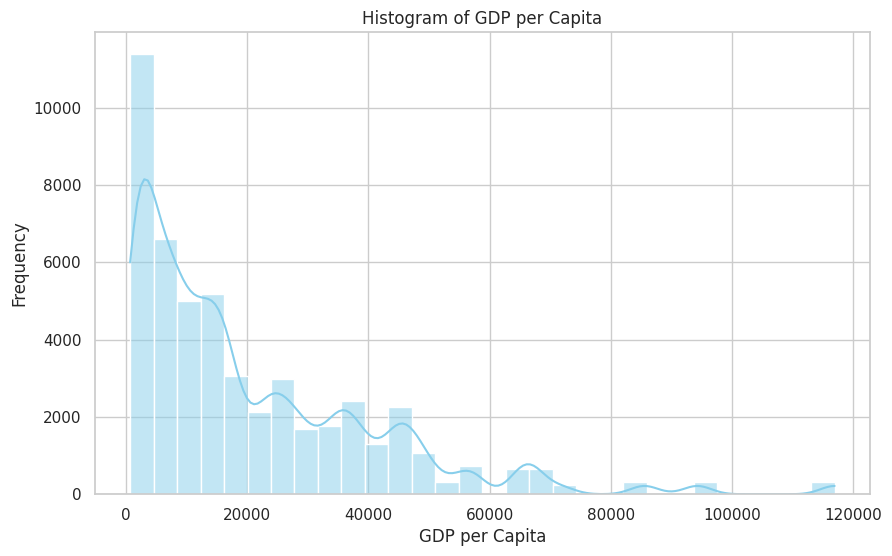

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


gdp_per_capita_column = df['Gdp_Per_Capita']


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(gdp_per_capita_column, kde=True, bins=30, color='skyblue')
plt.title('Histogram of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

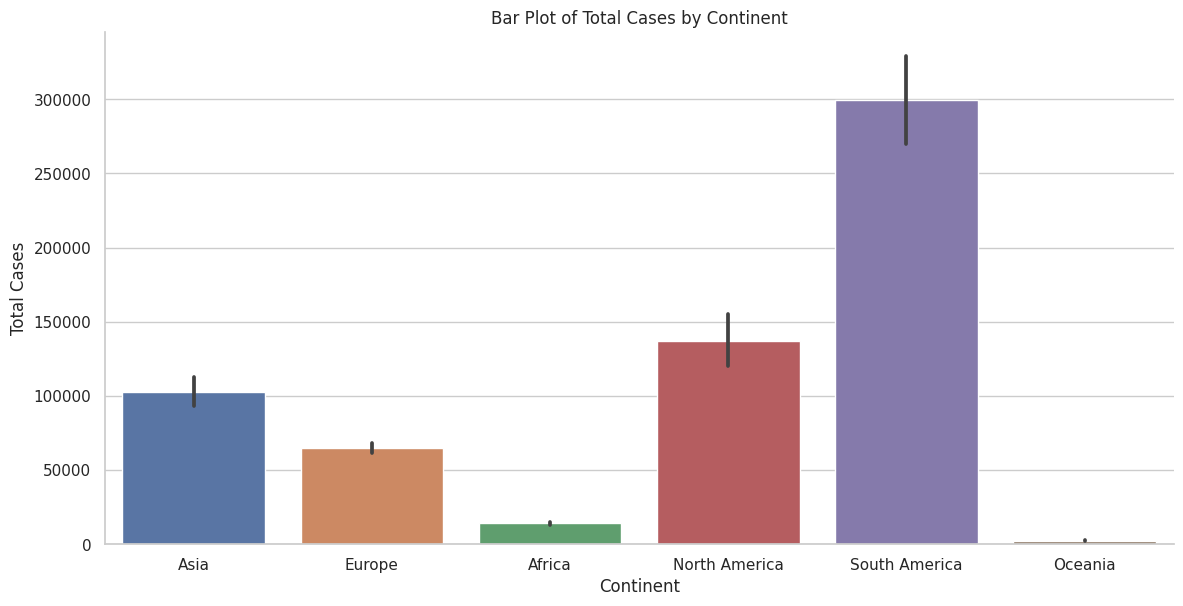

In [59]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Continent', y='Total_Cases', kind='bar', data=df, height=6, aspect=2)
plt.title('Bar Plot of Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()